## 1.) Predict cost of homes | Supervised - linear regression

#### **Feature Variables (9)** ####

1.  **longitude:** A measure of how far west a house is (a higher value is farther west)
2.  **latitude:** A measure of how far north a house is (a higher value is farther north)
3.  **housingMedianAge:** Median age of a house within a block (a lower number is a newer building)
4.  **totalRooms:** Total number of rooms within a block
5.  **totalBedrooms:** Total number of bedrooms within a block
6.  **population:** Total number of people residing within a block
7.  **households:** Total number of households, a group of people residing within a home unit, for a block
8.  **medianIncome:** Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.  **oceanProximity:** Location of the house in proximity to the ocean

#### **Target Variable (1)** ####
1. **medianHouseValue:** Median house value for households within a block (measured in US Dollars)
-------------------------------------------------------
# 2.) Predicts crime in the UK (England, Scotland, Wales, Northen Ireland). Supervised learning solving a binary classification
------------------------------------------------------
# 3.) Identifies Flowers in a image. Supervised ML solving a multi label classification problem
-------------------------------------------------------

## Extra Notes: 
#### Types of ML
- Supervised: have data and have results now train (classification)
- Unserpvised dont have results but want it to group and find results, find categories within the data, hospitality indu groups clients of the same kind (clusters)
- Reinforcement - train it like a dog, positive reinforcement feed it treats

#### Software Dev Lifecylce Stages:
1. Problem formation and understanding
         ^ aslo decide on the accuracy %
2. Data collection and preperation
3. Model training and testing
4. Model deployement and maintanace


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

1. Get data in and visualise what we have, look for outliers...
2. Use a heat map to understand correlations between the features/columns (Correlation matrix => 1)
3. Create features and remove previous features (Feature Engineering) (X/Y  =  a new feature based on good correlations of X to Y)
4. Use KNN (K-Nearest Neighbors) imputer to assign appropriate values to null values

------------------------------------------------------------------

### Started by getting the data in & familiarise yourself: 👾

In [7]:
import pandas as pd    # Data manipulation lib, data structures
import seaborn as sns  # Used for statistical graphics, built on matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# directs the notebook to display plots inline, directly below the 
# code cells where the plots are generated. Without this command, the plots might 
# appear in a separate window, or not at all, depending on your environment's configuration

housing_df = pd.read_csv(r'C:\Users\Loucas.Papaspyrou\OneDrive - 4Sight\Desktop\ML and AI Training + LinkedIn + Sonia Fabric\My First AI Course\housing.csv')  
housing_df.info()
housing_df.shape
housing_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [8]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Let's get an idea of the data and understand it 👾
- distribution
- outliers
- correlation between the data

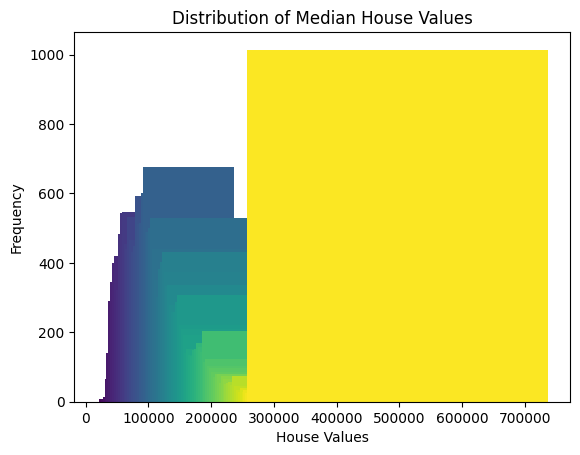

In [10]:
data = housing_df['median_house_value']
bins = 80
counts, bin_edges = np.histogram(data, bins=bins)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
cmap = plt.cm.viridis
norm = plt.Normalize(bin_edges[0], bin_edges[-1])
fig, ax = plt.subplots()

for count, edge, center in zip(counts, bin_edges, bin_centers):
    ax.bar(center, count, align='center', width=edge-bin_edges[0],
           color=cmap(norm(center)))

ax.set_xlabel("House Values")
ax.set_ylabel("Frequency")
plt.title("Distribution of Median House Values")
plt.show()

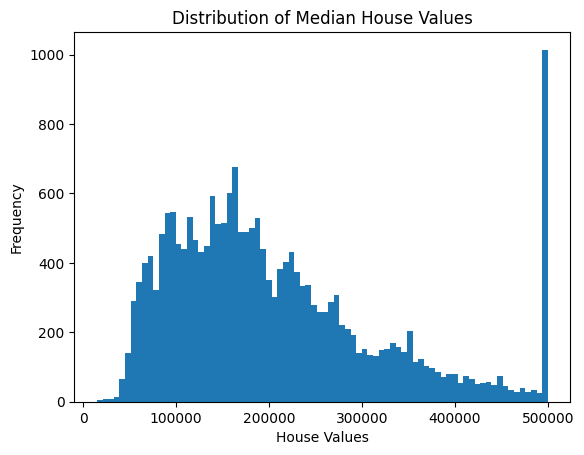

In [ ]:
plt.hist(housing_df['median_house_value'], bins= 80)
plt.xlabel("House Values")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Values")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

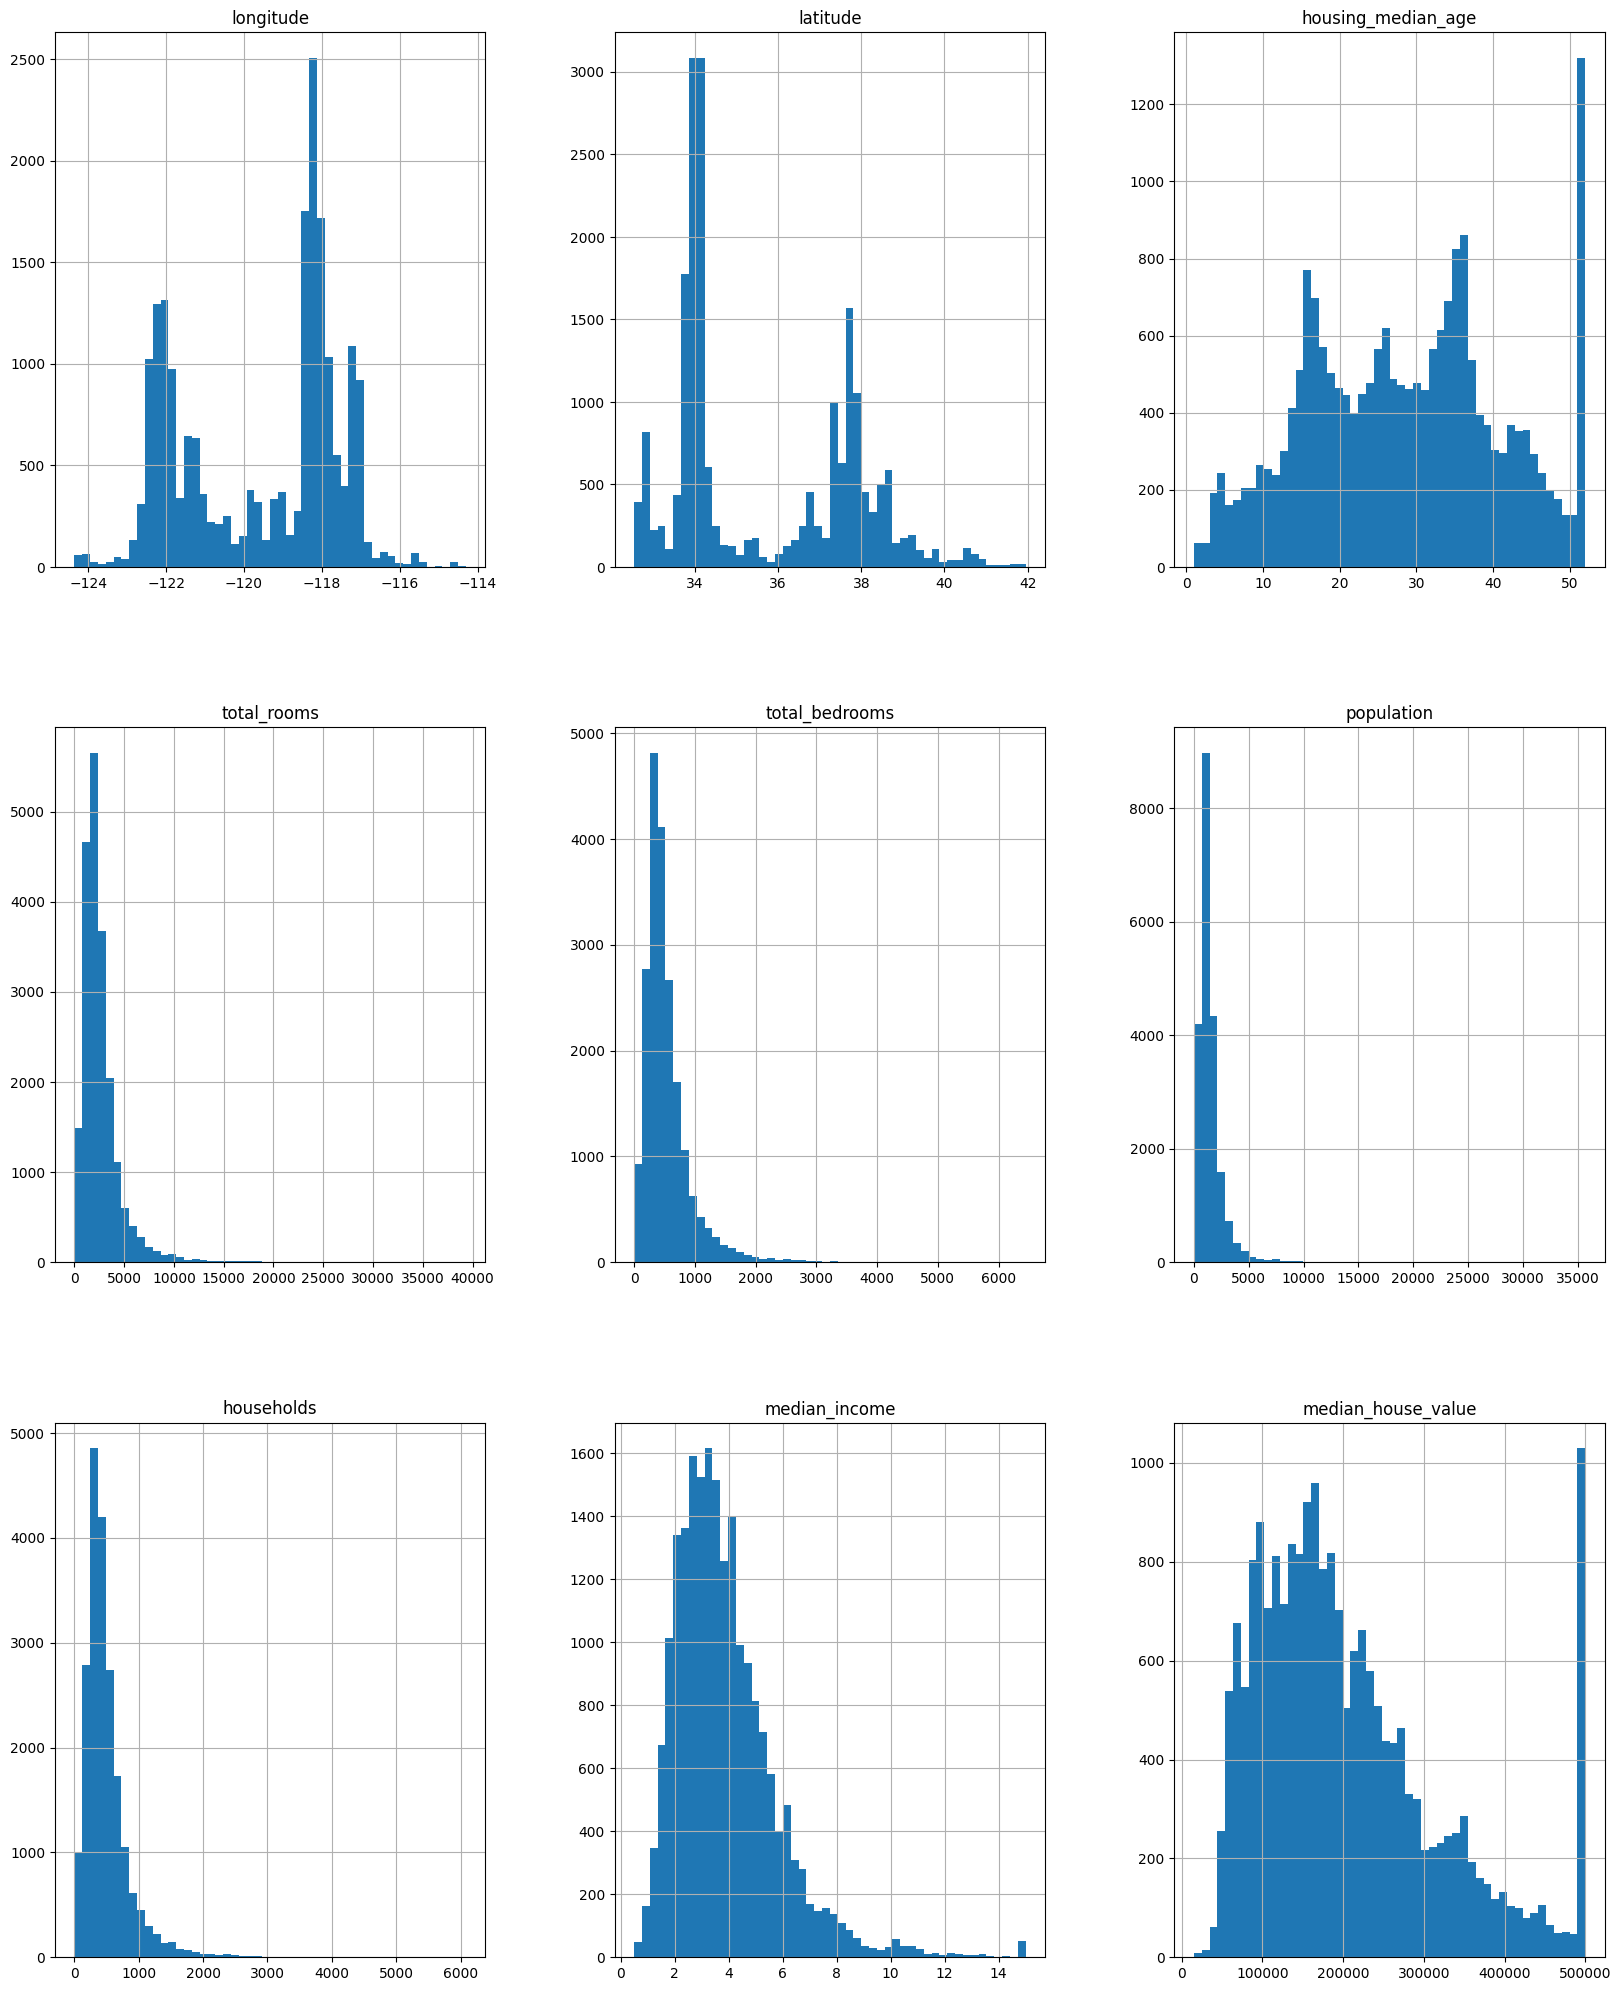

In [ ]:
housing_df.hist(bins=50, figsize=(20,25))
# median incomes has been scaled, 0.5 for lower and 15 for higher
# housing_median_age = extreme outliers
# median_house_value = extreme outliers

Heatmap 🔥
- Correlations between columns (features)
- Strong correlations can teach model the same thing -> remove or combine
- Remove duplicate features
- Dimentionality reduction

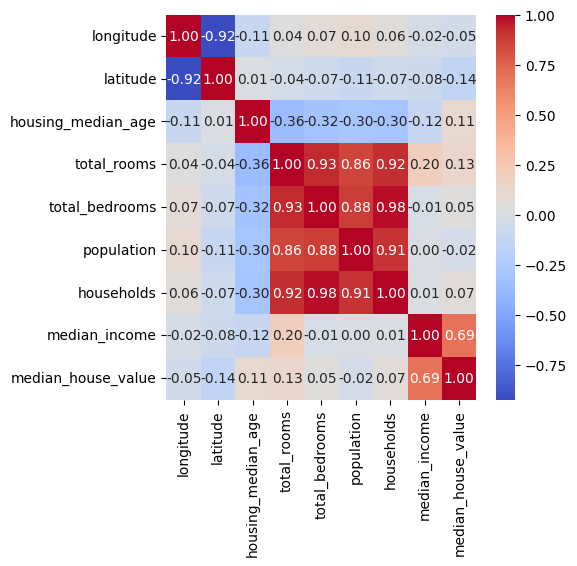

In [12]:
numeric_cols = housing_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()
#print(corr)

# Plotting the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Feature engineering
- Add features
- Remove features
- Manipulate data to improve model predictions using features


In [8]:
# lets see what features are having missing values
housing_df.isnull().sum()

# but this is wrong because all homes have atleast 1 bedroom!
# need to deal with them as they may skew the data

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
# % of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100  # shape[0] = number of rows in table
                                                                     # Dimensions of the df

1.002906976744186

Dealing with missing values options
- Delete rows with missing data 
- Use ML to predict missing vals
- Replace missing vals with mean or aver score
- Use ML that can handle missing data 



### KNN Imputer missing values 🌱
Use IMPUTATION (assign) to handle missing data when dataset is small

In [21]:
from sklearn.impute import KNNImputer
housing_df_temp = housing_df.copy()

# Retrieve colu with numerical data: exclude the ocean_prox column since data is string
columns_list=[col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# Extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# Update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [22]:
# Impute/assign missing data using machine learning 
# Initialize KNNImputer to impute missing data using ML
knn = KNNImputer(n_neighbors= 3)
# Fit function trains the model
knn.fit(housing_df_temp)

# Transform the data using the model
# Applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

Apply Feature Engineering

In [14]:
# We noted that several features have strong corr
# So its interesting if removing them would have an effect on the model
# We know there is a strong correlation between these variables so we create features based off the vars 
# If we use the strong correlations we should get strong correlations as the result

housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  int64  
 3   total_rooms               20640 non-null  int64  
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  int64  
 6   households                20640 non-null  int64  
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  int64  
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [15]:
# Remove the previous columns/features that we mergerd into features

housing_df = housing_df.drop('total_rooms',axis =1)
housing_df = housing_df.drop('households',axis =1)
housing_df = housing_df.drop('total_bedrooms',axis =1)
housing_df = housing_df.drop('population',axis =1)
housing_df = housing_df.drop('longitude',axis =1)
housing_df = housing_df.drop('latitude',axis =1)
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  int64  
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  int64  
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


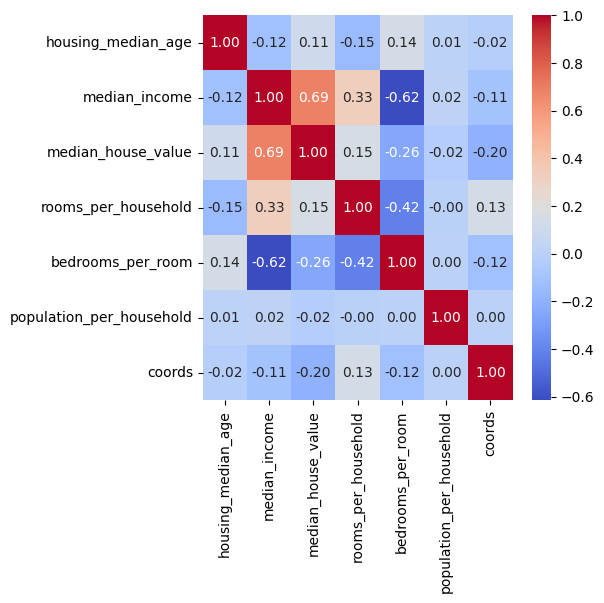

In [18]:

numeric_cols = housing_df.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# We see that the high correlation no longer exists as we removed the high correlation features

In [ ]:
# Most ML algorithms can only learn from numeric data so strings need to be converted.
# We will do it using one-hot encoding 🔥
housing_df.info()
# lets see unique categories for Ocean Prox
housing_df.ocean_proximity.unique()
housing_df["ocean_proximity"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  int64  
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  int64  
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_room         20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coords                    20640 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

One-hot encoding 🔥


In [ ]:
# Let's see how pandas get_dummies() function works
print(pd.get_dummies(housing_df['ocean_proximity']))
# Creates new binary columns indicating the presence of each possible value from the orginal data
# 5 possible values

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [ ]:
# Lets replace the Ocean Prox column using the get_dummies
housing_df_encoded = pd.get_dummies(data=housing_df, columns = ['ocean_proximity'])

# Print first obervations and notice that old ocean prox is gone
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,False,False,False,True,False
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,False,False,False,True,False
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,False,False,False,True,False
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,False,False,False,True,False
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,False,False,False,True,False


🐡So we just converted the text data to numerical data to actually use it, this is part of feature engineering.
First, we created features with highly relational data, then we removed the old correlating columns, and now we are creating correlations between the text and numeric data to effectively use the string information within our ML model.

🔥One-hot encoding can cause high cardinality
High cardinality refers to columns with a very large number of unique categories. When you apply one-hot encoding to such columns, it results in a large number of new binary features.
For instance, consider a column in your dataset that records a product ID with thousands of unique identifiers. One-hot encoding this column would create thousands of new features — one for each product ID. This significant increase in the number of features is what we refer to as high cardinality.

🌳An increase in features can result in the curse of dimensionality (a column = a dimension)
The curse of dimensionality, a term coined by Richard Bellman, refers to various problems that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in lower-dimensional settings.
Here are some of the problems associated with the curse of dimensionality:

Sparse Data: As the dimensionality increases, the volume of the space increases exponentially, and the data points become sparse. This vast space means that the data points are very far apart from each other, making any form of statistical significance testing very challenging.

Increased Computational Complexity: More features mean that the algorithms require more computational resources to process the data, which can lead to increased processing time and higher memory consumption.

Overfitting: With too many features and not enough observations, machine learning models can end up fitting the noise rather than the signal in the data. This is because the model might detect false relationships in the data that occur due to randomness or peculiarities in the sample rather than actual trends.

Diminishing Returns: Adding more features beyond a certain point does not necessarily improve the performance of the model — and in many cases, it might degrade the model’s ability to generalize to new data.

---
## Train a model

A machine learning model/algorithm studies data to fins patterns/trends. The trends are stored in the model.
Loss function (similar to error), how far the estimated value is from the expected. Loss functions are used to optimise and not really as an overall indication of the model.
Labeled data already has the answer you want the machine to predict
Evaluate the model using the remaing 20%, we used 80% to train the model 

Training a model is like us going through university
We get tested on a bunch of work we have seen before, we get results (loss functions) we then perform better according to the loss function and when it comes to the exam we get tested on the last bit we have not been tested on. 



### Loss Function Evaluation Metrics:

- Mean squared error (MSE)
- F1
- Accuracy
- AUC
- R^2


### Learning algorithms to choose from

- linear regression: 
    solve regression, predict numerics

- Logistic regression:
    Classification problems (NOT REGRESSION)
    Predict probability using binary values between a 1 and 0 Y value
    closer to 1 is better/more confident prediction

- Decision Tree
    _Classification_ & _Regression_ 
    Tree depth can be configured using hyper parameters 
    XGBoost - decision tree based ml model

- Random Forest
    set of _Decision Trees_
    Each tree makes its own prediction


# Will a stop lead to an arrest

Police stop and search data 

Features: 

Location
Gender, ethnicity, time of day etc




-----------------------------------
Process the dataset 

    KNN
    One-hot encoding categorical data
    Remove outliers
    Combine correlated features

Now a machine can learn from this data

# Look in next python script

# Look at the python file LiL Homeprediction

Now we are looking at regression 

Regression 
    Predict numberic values
    3 common algorithms 
        Linear 
        randomforestregressor 
        XGBoost (Use XGBost to train a model using the fit function in python)
            Fit function iterates over the data to produce the model
            Fit give you the list of hyperparameters



Target variable is what the machine learns how to predict
    we will use these alorithms...

        Scikits learn 
            linear regression - easy to train models with just a few lines of code

            RandomForestregressor 

            XGBoost (was best at predictions in this case and is generally better than other regression models)




    1.) Create the model and train it 
    2.) Run predictions 
    3.) Evaluate the model (test it) (compare actual values to predicted value)
    4.) Evaluate the R^2 (1 = good) (variance) (how accurate is our model compared to the actual values?)



So far we have done classifiaction and regression models with supervised learning 

Unpervised groups unlabelled data
Machine needs to figure things out independently
    Clustering - unsupervised learning technique
                 K-Means = clustering algorithm, groups data into clusters (all blue,black and white pictures will be grouped according to their colour)
                 K is the number of clusters K = 4, 4 groups
                 Can we define a hyperparater before training (Being k)
                 Find optimal number for K
                 Hospitality industry uses this alot for clustering groups of people, families, business men 
                 Text classification - sentiment analysis 
                 Word2Vec is a common learning algorithm